# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [130]:
import pandas as pd

#1.1)
airbnbData = pd.read_csv("data/airbnb_NYC.csv", encoding = 'latin1')

print(airbnbData["Price"].unique())
print(airbnbData["Price"].describe())

airbnbData["CleanedPrice"] = airbnbData["Price"].str.replace(",", "")
airbnbData["CleanedPrice"] = pd.to_numeric(airbnbData["CleanedPrice"], errors = 'coerce')
print(airbnbData["CleanedPrice"].describe())

print(airbnbData["CleanedPrice"].isna().sum())

#I determined how to clean the Price variable by first outputting information about it using unique() and describe(). I saw that price was of dtype: object meaning that it was not numeric. 
# Going off what unique() revealed, I began cleaning by replacing all commas with a "". I then used pd.to_numeric() to convert the cleaned price variable into dtype: float64. 
#I checked that my cleaning was successful by using describe() again to confirm that the variable was now numeric. Finally, I checked for any missing values using isna().sum() and got 0 missing values.

#1.2)
policeData = pd.read_csv("data/mn_police_use_of_force.csv")

print(policeData["subject_injury"].unique())
print(policeData["subject_injury"].value_counts())
print(policeData["subject_injury"].isna().sum())
print(policeData["subject_injury"].isna().mean())

policeData["CleanedSubjectInjury"] = policeData["subject_injury"].fillna("Missing")

print(pd.crosstab(policeData["CleanedSubjectInjury"], policeData["force_type"]))

#9848 out of 12925 (%76.19) values are missing.
#There is a pattern for when data is missing. Missing data seems to be most prevalent when force_type is Bodily Force, Chemical Irritant, and Taser.

#1.3)
metabricData = pd.read_csv("data/metabric.csv")
print(metabricData["Overall Survival Status"].value_counts())

newMetabric ={"0:LIVING":1, "1:DECEASED":0}
metabricData["Dummy Overall Survival Status"] = metabricData["Overall Survival Status"].map(newMetabric)
print(metabricData["Dummy Overall Survival Status"].value_counts())

#1.4)
print(airbnbData["Review Scores Rating"].isna().sum())
imputeVariable = airbnbData["Review Scores Rating"].median()
airbnbData["Imputed Review Scores Rating"] = airbnbData["Review Scores Rating"].fillna(imputeVariable)

#This might bias or otherwise negatively impact my results by potentially causing the final dataset to be skewed towards the median of the existing data, causing an inaccurate representation of the true data.
#If the actual values had been used instead of replacing the missing values, the dataset could be different and reveal previously hidden trends or patterns. The act of using the median to replace missing data
#can produce misleading results, potentially affecting the dataset in numerous negative ways.

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1,000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1,200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' 

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

[2026. 2016. 2025. 2024. 2023. 2022. 2021. 2020. 2019. 2018. 2017.   nan
 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008. 2007. 2006. 2005. 2004.
 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996. 1995. 1984. 1994. 1993.
 1992. 1991. 1990. 1989. 1969. 1988. 1987. 1986. 1985. 1983. 1982. 1981.
 1980. 1979. 1978. 1977. 1976. 1975. 1974. 1973. 1972. 1971. 1970. 1968.
 1967. 1966. 1965. 1964. 1963. 1962. 1961. 1960. 1959. 1958. 1957. 1956.
 1955. 1954. 1953. 1952. 1951. 1950. 1949. 1948. 1848. 1947. 1946. 1945.
 1944. 1943. 1942. 1941. 1940. 1939. 1938. 1937. 1936. 1935. 1934. 1933.
 1932. 1931. 1930. 1929. 1928. 1927. 1926. 1925. 1924. 1923. 1922. 1921.
 1920. 1919. 1918. 1917. 1916. 1915. 1914. 1913. 1912. 1911. 1910. 1909.
 1908. 1907. 1906. 1905. 1904. 1903. 1902. 1901. 1900. 1899. 1898. 1897.
 1896. 1895. 1894. 1893. 1892. 1891. 1890. 1889. 1888. 1887. 1886. 1885.
 1884. 1883. 1882. 1881. 1880. 1879. 1878. 1877. 1876. 1875. 1874. 1873.
 1872. 1871. 1870. 1869. 1868. 1867. 1866. 1865. 18

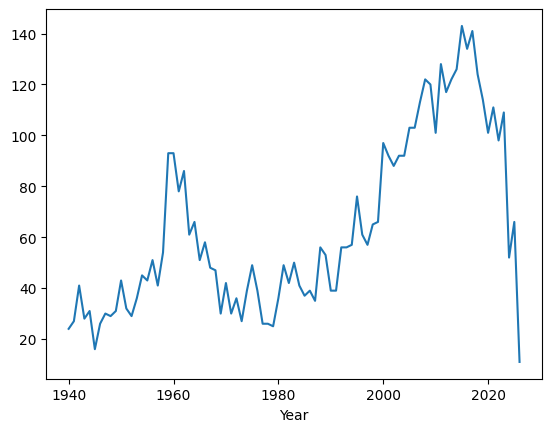

In [161]:
import pandas as pd

#2.1)
sharkData = pd.read_excel("data/GSAF5.xls")

#2.2)
sharkData = sharkData.drop(["Unnamed: 21", "Unnamed: 22"], axis = 1)
sharkData.columns

#2.3)
#An observation is the person, place, or thing being considered. In this dataset, an observation corresponds to a single row in the dataset, each depicting the details of a shark incident. Each column contains variables in the form of information about each shark incident, including things like
#date, year, type, country, state, location, activity, name, sex, age, injury, fatal Y/N, time, species, source, pdf, href formula, href case number, case number.1, and original order.
#Due to the layout of the dataframe and the nature of an observation, my choices to clean and analyze data will be focused on tracking the behavior of column variables as they spread across the multitude of shark incident observations. Columns
#like Date and Year will influence me to conduct time based analyses, while columns like Country, State, and Location will be more geographically focused. The goal of my cleaning and analysis will be to ensure each observation represents a clear summary of the shark incident it represents, aiming to uncover
#clear trends and patterns.

#2.4)
print(sharkData["Year"].unique())
print(sharkData["Year"].describe())
cleanedYear = (sharkData["Year"] > 1499)
sharkData = sharkData[cleanedYear]
print(sharkData["Year"].describe())

#The range of values I see for the year variable stretch from as early as 1500 to as late as 2026 with a median of 1988 and a mean of 1972.66.
#Before cleaning there were year values from 0-1000, which were removed due to the impossibility of the recording of shark attacks during that
#time period. A relatively large range of years are present in the dataset.

cleanedYear1940 = (sharkData["Year"] >= 1940)
sharkData1940 = sharkData[cleanedYear1940]
sharkData1940["Year"].value_counts().sort_index().plot()

#After filtering to focus on attacks since 1940, I can determine that attacks have generally increased from 1940 to 2018,
#but have experienced a steep decline post 2018.

#2.5)
#Included in the cell beneath this one in order to properly show the graph.

#2.6)
print(sharkData["Type"].unique())
sharkData["CleanedType"] = sharkData["Type"].map({"Unprovoked": "Unprovoked", "unprovoked": "Unprovoked", "Provoked": "Provoked", " Provoked": "Provoked"})
sharkData["CleanedType"] = sharkData["CleanedType"].fillna("Unknown")
print(sharkData["CleanedType"].unique())

print(sharkData["CleanedType"].value_counts())

#5110 out of 6939 (%73.64) attacks are unprovoked.

#2.7)
print(sharkData["Fatal Y/N"].unique())
sharkData["CleanedFatal"] = sharkData["Fatal Y/N"].map({"y": "Y", "Y x 2": "Y", "Y": "Y", "N": "N", " N": "N", "N ": "N", "n": "N", "F": "N"})
sharkData["CleanedFatal"] = sharkData["CleanedFatal"].fillna("Unknown")
print(sharkData["CleanedFatal"].unique())

#2.8)
print(pd.crosstab(sharkData["Type"], sharkData["Fatal Y/N"]))
print(pd.crosstab(sharkData["CleanedType"], sharkData["CleanedFatal"]))

#When the attack is provoked it is much less likely to be fatal then when the attack is unprovoked. I think this is the case because when a shark is provoked it probably isn't
#searching for food, instead an outside force is antagonizing it. However, an unprovoked attack is much more likely to be from a shark hunting, resulting in a higher fatality rate.

[13. nan 39. 11. 27. 12. 56. 55. 24. 26. 25. 61. 40. 14. 54. 48. 57.  8.
 63.  9. 19.  7. 85. 69. 18. 66. 21. 37. 16. 20. 42. 45. 30. 29. 35. 58.
 17. 36. 23. 28. 38. 68. 33. 15. 41. 43. 49. 46. 65. 64. 32. 10. 62. 22.
 52. 44. 47. 59. 50. 34. 77. 60. 73. 67.  6. 53. 51. 31. 71. 75. 70.  4.
 74.  3. 82. 72.  5. 86. 84. 87.  1. 81. 78.]
Axes(0.125,0.11;0.775x0.77)


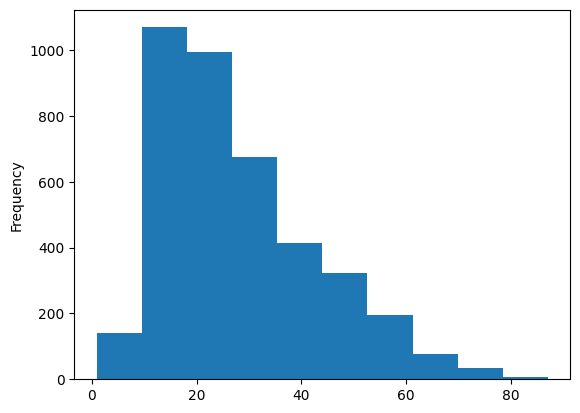

In [188]:
#2.5)
print(sharkData["Age"].unique())
sharkData["Age"] = pd.to_numeric(sharkData["Age"], errors = 'coerce')
print(sharkData["Age"].plot.hist())

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

In [193]:
#3.1)
#The paper is about exploring data tidying and how its framework and tools can be used to improve the effectiveness and efficiency of data cleaning.

#3.2)
#The "tidy data standard" is intended to "facilitate initial exploration and analysis of the data, and to simplify the development of data analysis tools that work well together."

#3.3)
#The sentence "Like families, tidy datasets are all alike buy every messy dataset is messy in its own way" means that all tidy datasets share similar standard in how they link the structure of a dataset, but that
#their original messy forms are unique. Essentially, once tidied, previously messy datasets are alike under a set of shared standards. The sentence: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general"
#means that within datasets determining observations and variables is easy due to the structured nature that tidying provides, but initially defining these variables and observations can be much more difficult due to the lack of straightforward structure and clarity in determining data attributes.

#3.4)
#Wickham defines values as "either numbers (if quantitative) or strings (if qualitative)", variables as containing "all values that measure the same underlying attribute across units", and observations
#as containing "all values measured on the same unit across attributes".

#3.5)
#Tidy Data is defined as "a standard way of mapping the meaning of a dataset to its structure" in section 2.3.

#3.6)
#The five most common problems with messy data sets are column headers are values, not variable names, multiple variables are stored in one column, variables are stored in both rows and columns,
#multiple types of observational units are stored in the same table, and a single observational unit is stored in multiple tables. The data in Table 4 is messy because the column headers are values when the column headers should be variable names
#and the frequency values aren't consolidated to a single column but are spread everywhere. "Melting" or stacking a dataset refers to turning the dataset's columns into rows.

#3.7)
#Table 11 is messy because there is a column for each possible day of the month and lots of missing values. Table 12 (a) is molten because the issue of missing values and concise column headers are fixed but the data isn't fully tidy yet due to element and value being column headers resulting in 2 entries for every date. Table 12 (b) is tidy
#because element and value have been removed as column headers and replaced by tmax and tmin, solving the problem of the double entries to produce a fully tide dataset.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
6. Which giftors provide the most money, in total? 

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64
Axes(0.125,0.11;0.775x0.77)
Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: Foreign Gift Amount, dtype: int64
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HON

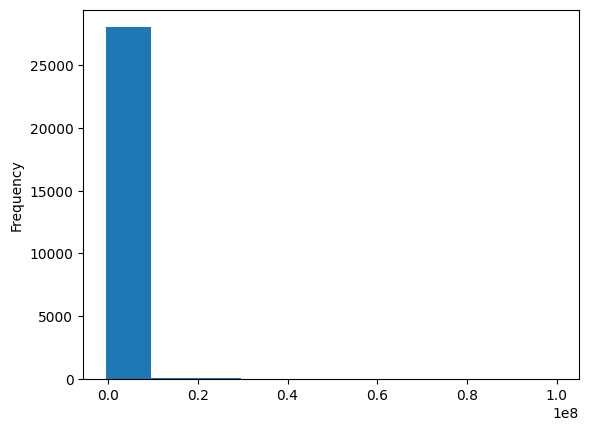

In [189]:
import pandas as pd

#4.1)
giftsData = pd.read_csv("data/ForeignGifts_edu.csv")

#4.2)
print(giftsData["Foreign Gift Amount"].describe())
print(giftsData["Foreign Gift Amount"].plot.hist())

#The Foreign Gift Amount variable is dtype: float64 has a 2.822100e+04 count with a mean of 5.882327e+05. It's range extends from -5.377700e+05 to  1.000000e+08. The histogram
#depicting Foreign Gift Amount is extremely left skewed, with almost the entirety of the data being contained within the previously mentioned range. It has some very few outliers, producing 
#a thin spread rightward.

#4.3)
print(giftsData["Gift Type"].value_counts())

#17274/28221 (61.21%) of the gifts are Contracts. 10936/28221 (38.75%) of the gifts are Monetary Gifts. 11/28221 (0.00039%) of the gifts are Real Estate.

#4.4)
topNumberOfGifts = giftsData.groupby("Country of Giftor").count()
print(topNumberOfGifts["Foreign Gift Amount"].sort_values(ascending = False).head(15))

#The top 15 countries in terms of number of gifts are (first to last): England, China, Japan, Switzerland, Saudi Arabia, France
#Germany, Hong Kong, South Korea, Qatar, The Netherlands, Korea, India, and Taiwan.

topNumberOfAmount = giftsData.groupby("Country of Giftor").sum()
print(topNumberOfAmount["Foreign Gift Amount"].sort_values(ascending = False).head(15))

#The top 15 countries in terms of amount given are (first to last): Qatar, England, China, Saudi Arabia, Bermuda, Canada, Hong Kong,
#Japan, Switzerland, India, Germany, United Arab Emirates, France, Singapore, and Australia.

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64
Axes(0.125,0.11;0.775x0.77)
Giftor Name
Qat

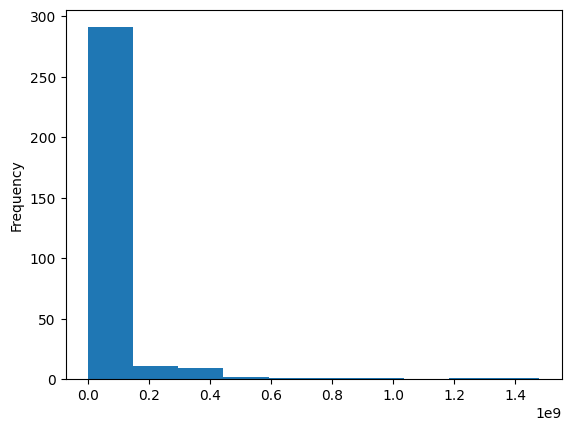

In [ ]:
#4.5)
topInstitutions = giftsData.groupby("Institution Name").sum()
print(topInstitutions["Foreign Gift Amount"].sort_values(ascending = False).head(15))

#The top 15 institutions in terms of the total amount of money they receive is (first to last): Carnegie Mellon University, Cornell University, Harvard University, Massachusetts Institute of Technology, Yale University,
#Texas A&M University, John Hopkins University, Northwestern University, Georgetown University, University of Chicago (The), University of Colorado Boulder, Duke University, Brigham Young University,
#Stanford University, and University of Texas MD Anderson Cancer Center.

print(topInstitutions["Foreign Gift Amount"].plot.hist())

#4.6)
topGiftors = giftsData.groupby("Giftor Name").sum()
print(topGiftors["Foreign Gift Amount"].sort_values(ascending = False).head(15))

#The top 15 giftors in terms of total amount given are (first to last): Qatar Foundation, Qatar Foundation/Qatar National Res, Qatar Foundation for Education, Anonymous, Saudi Arabian Cultural Mission, HCL,
#Church of Jesus Christ of LDS, Emirates Institute for Advanced Sc, QIC, Anonymous #9, Qatar National Research Fund, Government of Saudi Arabia, Contracting Party,
#CMKL University, and the Royal Embassy of Saudi Arabia.

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

(3798, 63)
   index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ...   
2            Baccalaureate Colleges--Arts & Sciences  NaN      NaN  ... 

control
Private for-profit        Axes(0.125,0.11;0.775x0.77)
Private not-for-profit    Axes(0.125,0.11;0.775x0.77)
Public                    Axes(0.125,0.11;0.775x0.77)
Name: grad_100_value, dtype: object

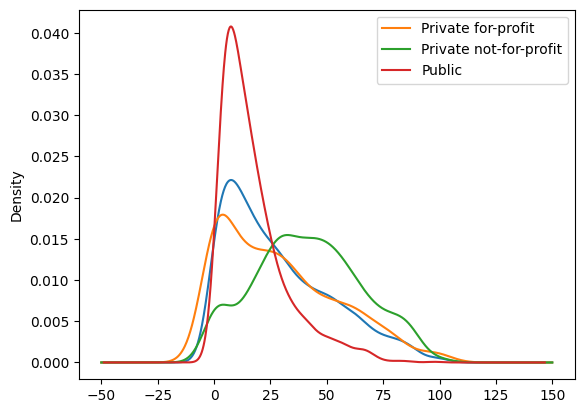

In [ ]:
import pandas as pd

#5.1)
collegeData = pd.read_csv("data/college_completion.csv")

#5.2)
print(collegeData.shape)
print(collegeData.head())

#There are 3798 observations and 63 variables in the data.zip

#5.3)
print(pd.crosstab(collegeData["control"], collegeData["level"]))

#I see that 4-year colleges are primarily Private not-for-profit while 2-year colleges are primarily Public. Both contain a large bias towards those patterns.

#5.4)
collegeData["grad_100_value"].plot.kde()

#The line in the table stays at 0 until around -10 it spikes up extremely fast to above 0.020 density then steadily declines until it bottoms back out at zero around 110.

#5.5)
collegeData.groupby("control")["grad_100_value"].plot.kde(legend = True)

#The line for public spikes extremely fast at around -10 from 0 to above 0.040 density then transitions from a sharp to steady decline around 30.
#The line for private not-for-profit steadily rises from -20 peaking around 0.015 density then steadily declining from there.
#The line for private for-profit spikes at -20 to around 0.017 density then steadily declines from there.
#Private not-for-profit has the most favorable graduation rate.


                   aid_value  grad_100_value
aid_value       4.121201e+07    88610.483169
grad_100_value  8.861048e+04      543.483382
                aid_value  grad_100_value
aid_value        1.000000        0.575879
grad_100_value   0.575879        1.000000


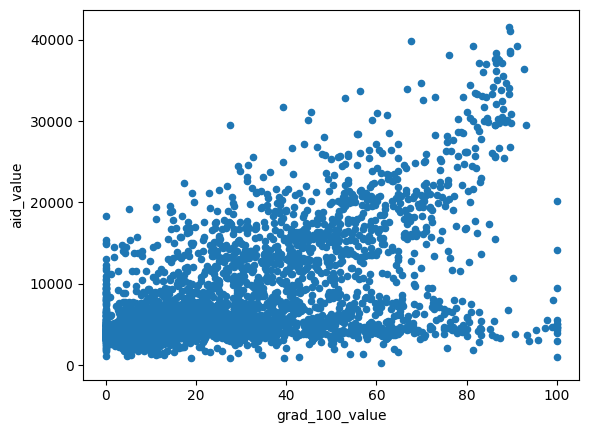

In [ ]:
#5.5)
collegeData.plot.scatter(x = "grad_100_value", y = "aid_value")

print(collegeData[["aid_value", "grad_100_value"]].cov())
print(collegeData[["aid_value", "grad_100_value"]].corr())

#I see a large concentration of data points in the bottom left with a dense spread to the right ending around 70. There is a trend to the
#upper right that gets sparser as is extends. I observe a positive correlation between the two values. I also see a positive covariance and positive correlation.


control
Private for-profit        Axes(0.125,0.11;0.775x0.77)
Private not-for-profit    Axes(0.125,0.11;0.775x0.77)
Public                    Axes(0.125,0.11;0.775x0.77)
dtype: object

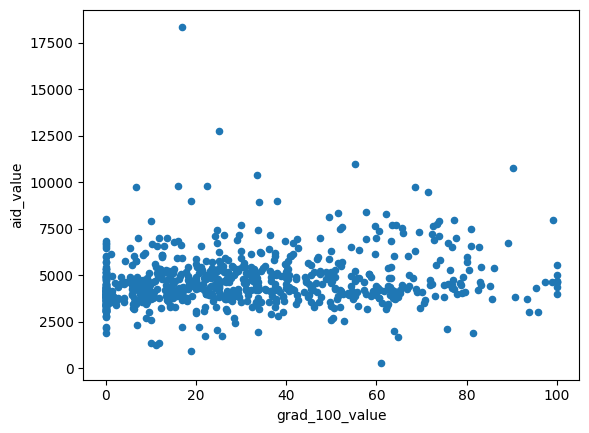

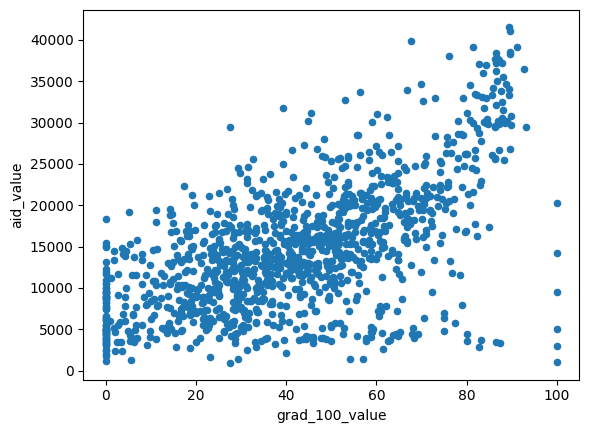

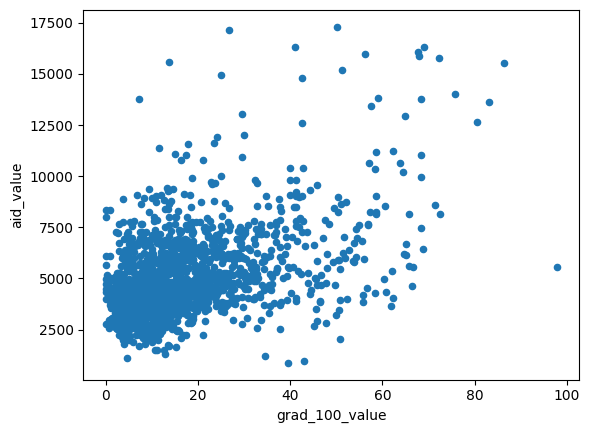

In [ ]:
#5.5)
collegeData.groupby("control").plot.scatter(x = "grad_100_value", y = "aid_value")

#The private for-profit scatter plot has an even spread up until a grad_100_value of about 80. There isn't really a positive or negative correlation. There are a few outliers.
#The private not-for-profit scatter plot has a clear positive correlation with a couple outliers.
#The public scatter plot has an extreme concentration of values in the bottom left of the graph with values scattered around it in the remaining 3 quadrants. There is a loose positive correlation.
#Aid seems to vary positively with graduation rates strongly for private not-for-profit colleges and loosely for public colleges.

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

In [32]:
#Work uploaded as PDF in git repo.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

Index(['Order', 'PID', 'area', 'price', 'MS.SubClass', 'MS.Zoning',
       'Lot.Frontage', 'Lot.Area', 'Street', 'Alley', 'Lot.Shape',
       'Land.Contour', 'Utilities', 'Lot.Config', 'Land.Slope', 'Neighborhood',
       'Condition.1', 'Condition.2', 'Bldg.Type', 'House.Style',
       'Overall.Qual', 'Overall.Cond', 'Year.Built', 'Year.Remod.Add',
       'Roof.Style', 'Roof.Matl', 'Exterior.1st', 'Exterior.2nd',
       'Mas.Vnr.Type', 'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond',
       'Foundation', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure',
       'BsmtFin.Type.1', 'BsmtFin.SF.1', 'BsmtFin.Type.2', 'BsmtFin.SF.2',
       'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Heating', 'Heating.QC', 'Central.Air',
       'Electrical', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF',
       'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath',
       'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual', 'TotRms.AbvGrd',
       'Functional', 'Fireplaces', 'Fireplace.Qu', 'Garage.Type',
       'Garage.Yr.B

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64

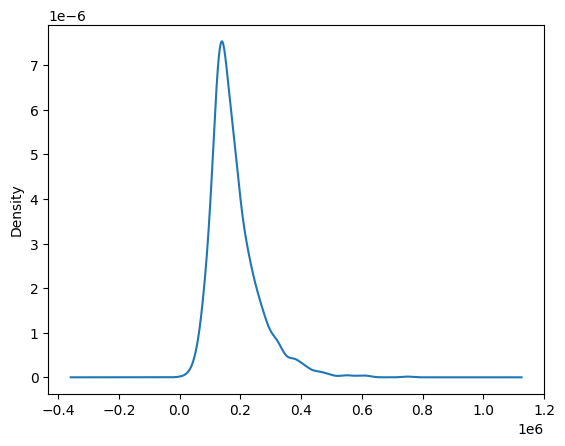

In [6]:
import pandas as pd 

pricesData = pd.read_csv("data/ames_prices.csv")
print(pricesData.columns)

#7.1)
completionData = pd.read_csv("data/college_completion.csv")

#7.2)
pricesData["price"].plot.kde()
pricesData["price"].describe()

Bldg.Type
1Fam      Axes(0.125,0.11;0.775x0.77)
2fmCon    Axes(0.125,0.11;0.775x0.77)
Duplex    Axes(0.125,0.11;0.775x0.77)
Twnhs     Axes(0.125,0.11;0.775x0.77)
TwnhsE    Axes(0.125,0.11;0.775x0.77)
Name: price, dtype: object

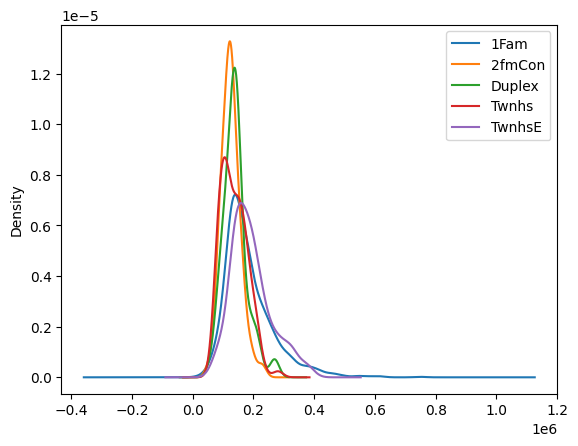

In [ ]:
#7.2)
pricesData.groupby("Bldg.Type")["price"].plot.kde(legend = True)

#On average, 1Fam are the most expensive. 1Fam have the highest variance in transaction prices as well.

12789
129500.0
160000.0
213500.0
755000


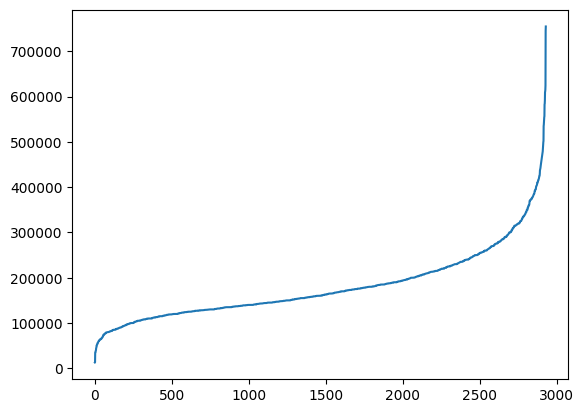

In [17]:
#7.3)
pricesData["price"].sort_values().reset_index(drop = True).plot()
print(pricesData["price"].min())
print(pricesData["price"].quantile(0.25))
print(pricesData["price"].median())
print(pricesData["price"].quantile(0.75))
print(pricesData["price"].max())

<Axes: >

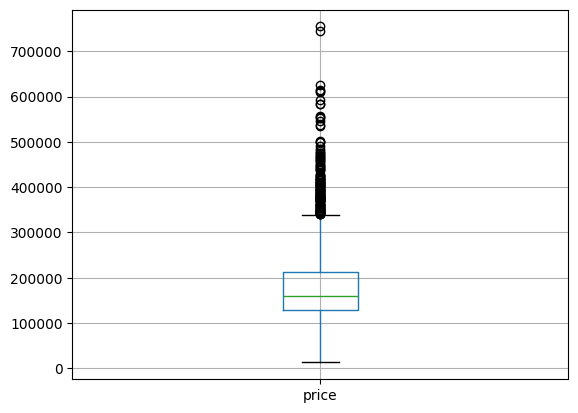

In [ ]:
#7.4)
pricesData.boxplot(column = "price")

#There are a large number of outliers extending into the upper prices, focused around 350000 to 500000 but going up to above 700000.

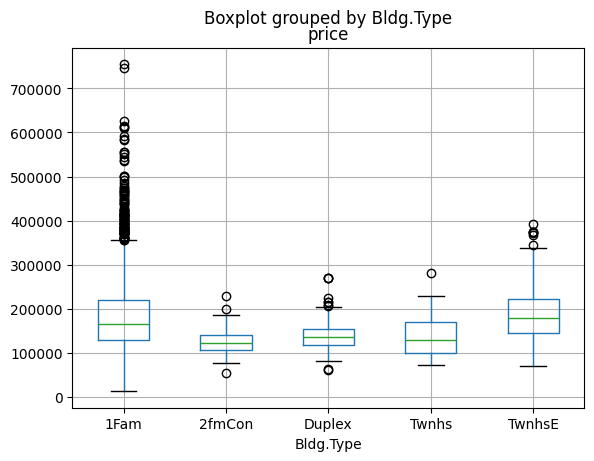

In [30]:
#7.4)
pricesData.boxplot(column = "price", by = "Bldg.Type")

#Some patterns I see are 1Fam has the largest amount of outliers by far, while Twnhs has the least. 1Fam also has the longest whiskers, while 
#2fmCon, Duplex, and Twnhs have relatively short ones. Their medians are all relatively close though.

#7.5)
lowQuantile = pricesData["price"].quantile(0.25)
highQuantile = pricesData["price"].quantile(0.75)
quantileRange = highQuantile - lowQuantile
pricesData["dummyOutlier"] = ((pricesData["price"] < lowQuantile - (1.5 * quantileRange)) | (pricesData["price"] > highQuantile + (1.5 * quantileRange)))

count      2930.000000
mean     177082.283959
std       67906.837135
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      339500.000000
Name: priceWinsorize, dtype: float64

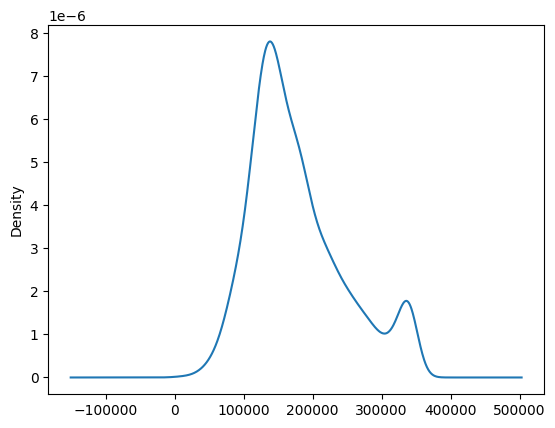

In [ ]:
#7.6)
lowRange = lowQuantile - 1.5 * quantileRange
highRange = highQuantile + 1.5 * quantileRange
pricesData["priceWinsorize"] = pricesData["price"]
pricesData.loc[pricesData["price"] < lowRange, "priceWinsorize"] = lowRange
pricesData.loc[pricesData["price"] > highRange, "priceWinsorize"] = highRange
pricesData["priceWinsorize"].plot.kde()
pricesData["priceWinsorize"].describe()

#The results change by the std decreasing, resulting in an altered graph shape. There is also a slight spike after the initial decline, something that wasn't present before.
#The mean of the new table is lower and the max is significantly lower.
